In [67]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

oregon_washington_map = gpd.read_file("BLM_OR_County_Boundaries_Polygon_Hub.shp")
oregon_map = oregon_washington_map[oregon_washington_map['COBCODE'].str[:2] == "OR"].copy()

home_values = pd.read_csv("oregon_county_home_values.csv")

print(oregon_map.head())

DataSourceError: BLM_OR_County_Boundaries_Polygon_Hub.shp: No such file or directory

In [63]:
washington_counties = ["ADAMS", "ASOTIN", "CHELAN", "CLALLAM", "CLARK", "COLUMBIA", "COWLITZ", "FERRY", "FRANKLIN", "GARFIELD", "GRAYS HARBOR", "ISLAND", "KING", "KITSAP", "KITTITAS", "KLICKITAT", "LEWIS", "MASON", "OKANOGAN", "PACIFIC", "PEND OREILLE", "PIERCE", "SAN JUAN", "SKAGIT", "SKAMANIA", "SNOHOMISH", "SPOKANE", "STEVENS", "THURSTON", "WAHKIAKUM", "WALLA WALLA", "WHATCOM", "WHITMAN", "YAKIMA"]

# rename the column to match
oregon_map = oregon_map.rename(columns={"COUNTY_NAM": "County"})
home_values = home_values.rename(columns={"Average Home Value Index": "HomeValueIndex"})

# filter out counties in Washington. They came with the shapefile
home_values = home_values[~home_values["County"].isin(washington_counties)]
oregon_map = oregon_map[~oregon_map["County"].isin(washington_counties)]

# merge the shape file with the home value index file. Similar to a SQL join.
oregon_map = oregon_map.merge(home_values, on="County", how="left")

print(oregon_map["County"].unique())

['JOSEPHINE' 'CURRY' 'JACKSON' 'COOS' 'KLAMATH' 'LAKE' 'DOUGLAS' 'HARNEY'
 'LANE' 'DESCHUTES' 'MALHEUR' 'CROOK' 'BENTON' 'LINN' 'JEFFERSON' 'GRANT'
 'LINCOLN' 'WHEELER' 'POLK' 'BAKER' 'MARION' 'YAMHILL' 'CLACKAMAS' 'WASCO'
 'HOOD RIVER' 'MULTNOMAH' 'SHERMAN' 'WASHINGTON' 'TILLAMOOK' 'GILLIAM'
 'UNION' 'MORROW' 'WALLOWA' 'UMATILLA' 'CLATSOP']


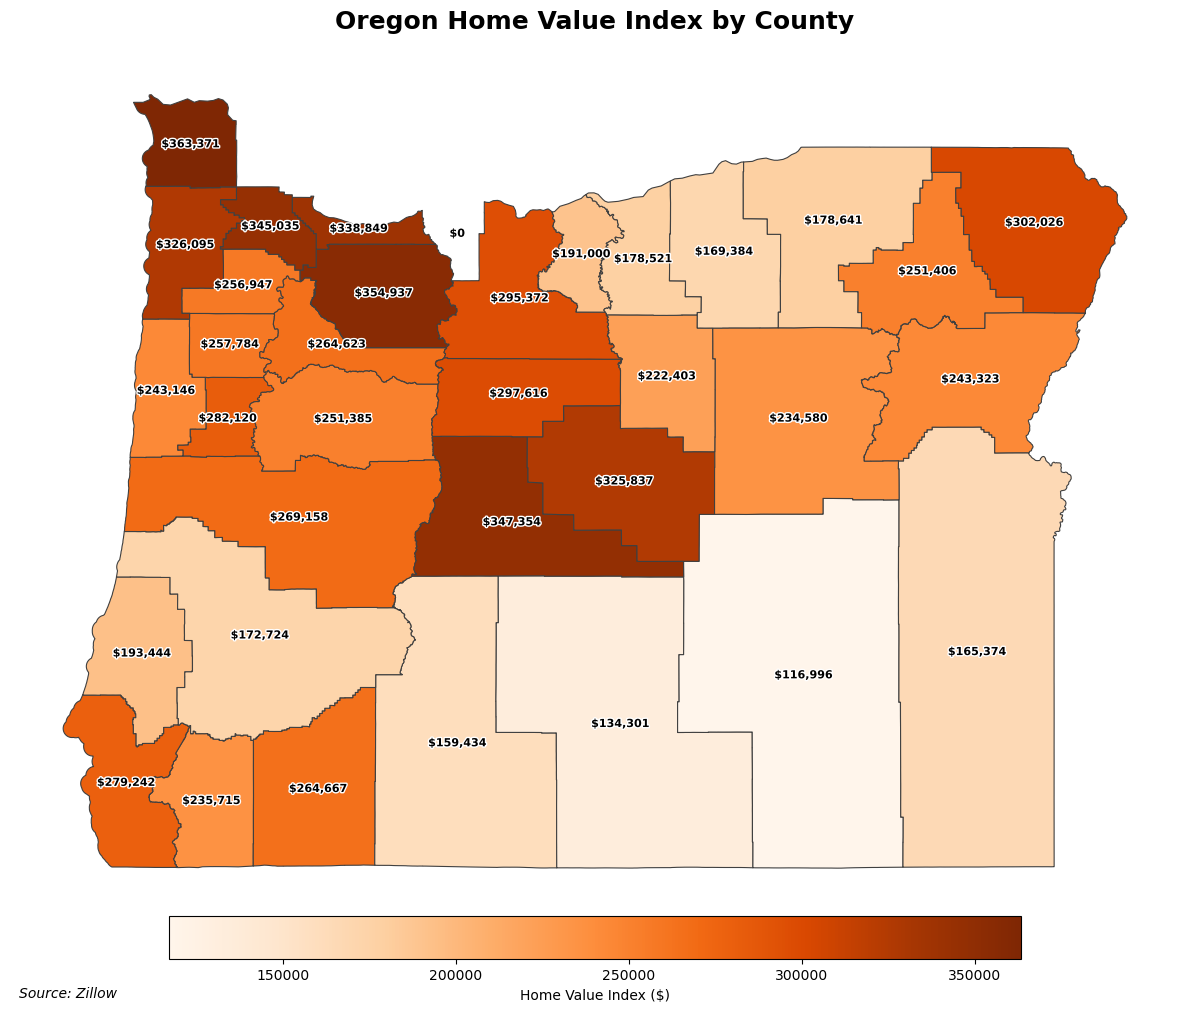

In [65]:
colors = ["#fff5eb", "#fee6ce", "#fdd0a2", "#fdae6b", "#fd8d3c", "#f16913", "#d94801", "#a63603", "#7f2704"]
custom_cmap = LinearSegmentedColormap.from_list("custom_oranges", colors)

# Set up the figure with a specific background color
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map with enhanced styling
oregon_map.plot(
    column="HomeValueIndex",
    cmap=custom_cmap,
    linewidth=0.8,
    edgecolor="#404040",
    legend=True,
    ax=ax,
    legend_kwds={
        'label': "Home Value Index ($)",
        'orientation': "horizontal",
        'shrink': 0.8,
        'pad': 0.01,
        'fraction': 0.046
    }
)

# Add text labels for each county with the home value index
for idx, row in oregon_map.iterrows():
    # Get the centroid of the county polygon
    centroid = row.geometry.centroid
    
    # Format the value with commas for thousands and no decimal places
    try:
        value_text = f"${int(row['HomeValueIndex']):,}"
    except ValueError:
        value_text = "$0"
        
    
    # Add the text with a white outline for better visibility
    text = ax.text(
        centroid.x, 
        centroid.y, 
        value_text,
        fontsize=8,
        ha='center',
        va='center',
        fontweight='bold',
        color='black',
        path_effects=[
            PathEffects.withStroke(linewidth=2, foreground='white')  # Use PathEffects, not plt.patheffects
        ]
    )

# Improve the title with styling
ax.set_title("Oregon Home Value Index by County", 
             fontsize=18, 
             fontweight='bold', 
             pad=20)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add a source note
plt.figtext(0.02, 0.02, "Source: Zillow", 
            fontsize=10, 
            fontstyle='italic')

# Adjust layout
plt.tight_layout()

# Display the map
plt.show()